In [171]:
using CSV, Tables, LinearAlgebra, Random, Gurobi, JuMP, DataFrames, Statistics, MLJ, Plots, Clustering, Distances

In [193]:
include("../src/utils.jl");
include("../src/opt.jl");

In [185]:
K, N, D, std, seed = 2, 20, 2, 0.45, 42;

In [186]:
data = generate_points(K, N, D, std, seed);

In [187]:
data

20×2 Matrix{Float64}:
 0.804045  0.0979372
 0.113137  0.80592
 1.0       0.027179
 0.814003  0.0639301
 0.926129  0.18735
 0.8359    0.0
 0.394593  0.83583
 0.166642  1.0
 0.861674  0.0317242
 0.760735  0.049997
 0.941187  0.145153
 0.0       0.880181
 0.105861  0.96044
 0.158509  0.979027
 0.227285  0.879935
 0.151938  0.891556
 0.784757  0.132387
 0.243904  0.784829
 0.163627  0.915513
 0.247164  0.988073

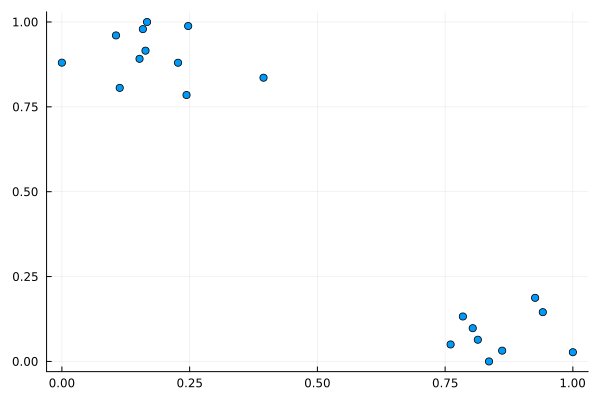

In [188]:
plot(data[:,1], data[:,2], seriestype=:scatter, legend=false)

In [198]:
assignments = gamma_formulation(data, K)
centroids = get_centroids(assignments, data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


2×2 Matrix{Float64}:
 0.858714  0.0817397
 0.179333  0.901937

In [195]:
#a, θ, f, b, γ = gamma_formulation(data, K);

In [199]:
assignments

20×2 Matrix{Float64}:
  1.0  0.0
 -0.0  1.0
  1.0  0.0
  1.0  0.0
  1.0  0.0
  1.0  0.0
 -0.0  1.0
 -0.0  1.0
  1.0  0.0
  1.0  0.0
  1.0  0.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0
  1.0  0.0
 -0.0  1.0
 -0.0  1.0
 -0.0  1.0

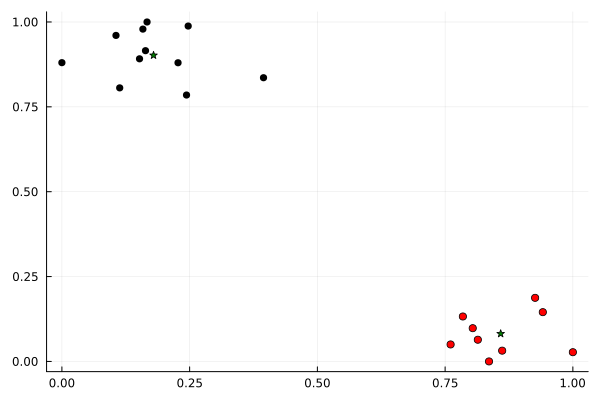

In [200]:
mapping = Dict(1=>:red, 2=>:black, 3=>:blue)
colors = [mapping[v] for v in argmax.(eachrow(assignments))];

plot(data[:,1], data[:,2], seriestype=:scatter, legend=false, color=colors)
plot!(centroids[:,1], centroids[:,2], seriestype=:scatter, legend=false, color=:green, markershape=:star5)